In [3]:
import sklearn.cross_validation as cv
from sklearn import linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
with open("p1.json") as file:
    data = json.load(file)
    
print (len(data))

21


In [5]:
minv = [float(x['ncloc']) for x in data]
print (minv)
majv = [float(x['functions']) for x in data]
print (majv)

minv.append(10)
majv.append(1)
minv.append(12)
majv.append(1)
minv.append(25)
majv.append(2)

[195.0, 108265.0, 9838.0, 26166.0, 5867.0, 684.0, 6737.0, 12984.0, 916.0, 10338.0, 41315.0, 2338.0, 9112.0, 619.0, 739.0, 9032.0, 89384.0, 1058.0, 64546.0, 430.0, 2969.0]
[16.0, 2697.0, 759.0, 2917.0, 609.0, 36.0, 312.0, 962.0, 116.0, 626.0, 2472.0, 212.0, 1298.0, 46.0, 41.0, 489.0, 5947.0, 100.0, 5540.0, 21.0, 261.0]


In [6]:
for i in range(len(minv) - 1):
    for j in range(i+1, len(minv)):
        if minv[i] > minv[j]:
            minv[i], minv[j] = minv[j], minv[i]
            majv[i], majv[j] = majv[j], majv[i]
            
del minv[len(minv) - 1]
del majv[len(majv) - 1]

print (minv)
print (majv)

[10, 12, 25, 195.0, 430.0, 619.0, 684.0, 739.0, 916.0, 1058.0, 2338.0, 2969.0, 5867.0, 6737.0, 9032.0, 9112.0, 9838.0, 10338.0, 12984.0, 26166.0, 41315.0, 64546.0, 89384.0]
[1, 1, 2, 16.0, 21.0, 46.0, 36.0, 41.0, 116.0, 100.0, 212.0, 261.0, 609.0, 312.0, 489.0, 1298.0, 759.0, 626.0, 962.0, 2917.0, 2472.0, 5540.0, 5947.0]


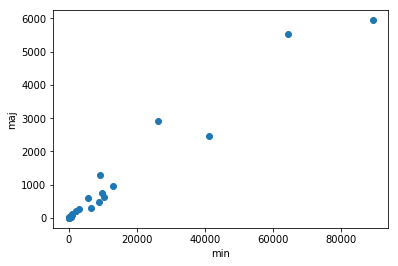

In [7]:
x = np.array(minv)
y = np.array(majv)

plt.scatter(x, y)
plt.xlabel("min")
plt.ylabel("maj")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
X_train = np.atleast_2d(X_train).T
y_train = np.atleast_2d(y_train).T
X_test = np.atleast_2d(X_test).T
y_testt = np.atleast_2d(y_test).T

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lasso = make_pipeline(PolynomialFeatures(3), Ridge())
lasso.fit(X_train, y_train)

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9328435878492715e-30 / 1.1102230246251565e-16
  RuntimeWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [10]:
lasso_score = lasso.score(X_train, y_train)
print (lasso_score)

0.992663074067113


In [11]:
predict = lasso.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

print ('r2_score:', r2_score(y_test, predict))

r2_score: 0.7425464273789448


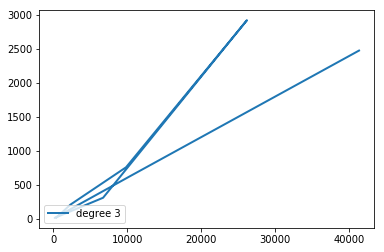

In [21]:
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, predict, color='blue', linewidth=3)


plt.plot(X_test, y_test, linewidth=lw,
             label="degree %d" % 3)

plt.legend(loc='lower left')

plt.show()

In [23]:
print (lasso.predict(100000))

[[5493.24402109]]


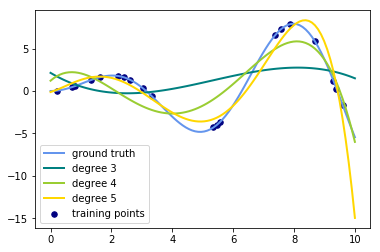

In [20]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()